In [1]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install -U yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
df.columns = ['CustomerID', 'Gender', 'Age', 'Income', 'Spend']

In [10]:
df.head()

,CustomerID,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Classify similar customer based on Income and Spend

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

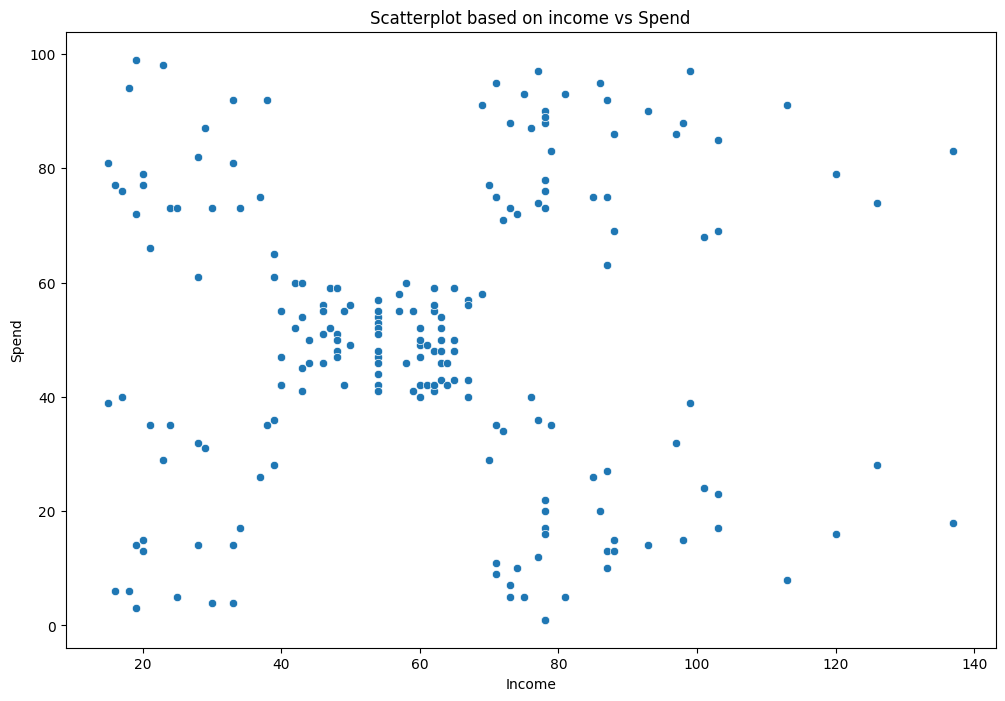

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Income', y='Spend')
plt.title('Scatterplot based on income vs Spend')
plt.show()

## Seperate X value from data
those parameter which we will be using for classify

In [13]:
X = df[['Income', 'Spend']]

In [14]:
X.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Create a preprocessing pipeline

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [16]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [51]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,Income,Spend,Labels
0,-1.738999,-0.434801,0.727191
1,-1.738999,1.195704,-1.724015
2,-1.700830,-1.715913,0.727191
3,-1.700830,1.040418,-1.724015
4,-1.662660,-0.395980,0.727191


## For Kmean method find Optimal value of K with Elbow method

In [18]:
from yellowbrick.cluster.elbow import kelbow_visualizer

In [19]:
%pip install setuptools

Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.cluster import KMeans

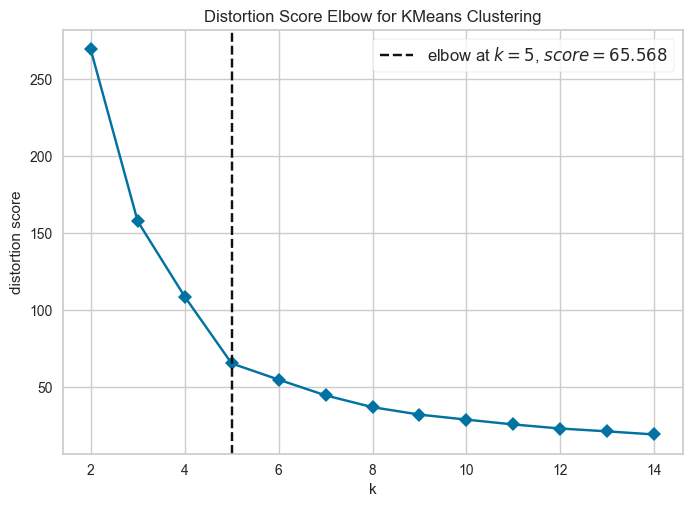

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [21]:
kelbow_visualizer(KMeans(),
                  X_pre,
                  k=(2,15),
                  timings=False)


In [22]:
model = KMeans(n_clusters=5)
model.fit(X_pre)

KMeans(n_clusters=5)

In [23]:
model.labels_

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2,
       3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 4, 2, 4, 1, 4, 1, 4,
       2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [24]:
X['Labels'] = model.labels_

In [25]:
X.head()

,Income,Spend,Labels
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3


In [26]:
X['Labels'].unique()

array([3, 0, 2, 4, 1])

In [27]:
X[X['Labels']==0]

,Income,Spend,Labels
1,15,81,0
3,16,77,0
5,17,76,0
7,18,94,0
9,19,72,0
11,19,99,0
13,20,77,0
15,20,79,0
17,21,66,0
19,23,98,0


In [28]:
X[X['Labels']==1]

,Income,Spend,Labels
124,70,29,1
128,71,11,1
130,71,9,1
134,73,5,1
136,73,7,1
138,74,10,1
140,75,5,1
144,77,12,1
146,77,36,1
148,78,22,1


In [29]:
X[X['Labels']==2]

,Income,Spend,Labels
43,39,61,2
46,40,55,2
47,40,47,2
48,40,42,2
49,40,42,2
...,...,...,...
121,67,40,2
122,69,58,2
126,71,35,2
132,72,34,2


In [30]:
X[X['Labels']==3]

,Income,Spend,Labels
0,15,39,3
2,16,6,3
4,17,40,3
6,18,6,3
8,19,3,3
10,19,14,3
12,20,15,3
14,20,13,3
16,21,35,3
18,23,29,3


In [31]:
X[X['Labels']==4]

,Income,Spend,Labels
123,69,91,4
125,70,77,4
127,71,95,4
129,71,75,4
131,71,75,4
133,72,71,4
135,73,88,4
137,73,73,4
139,74,72,4
141,75,93,4


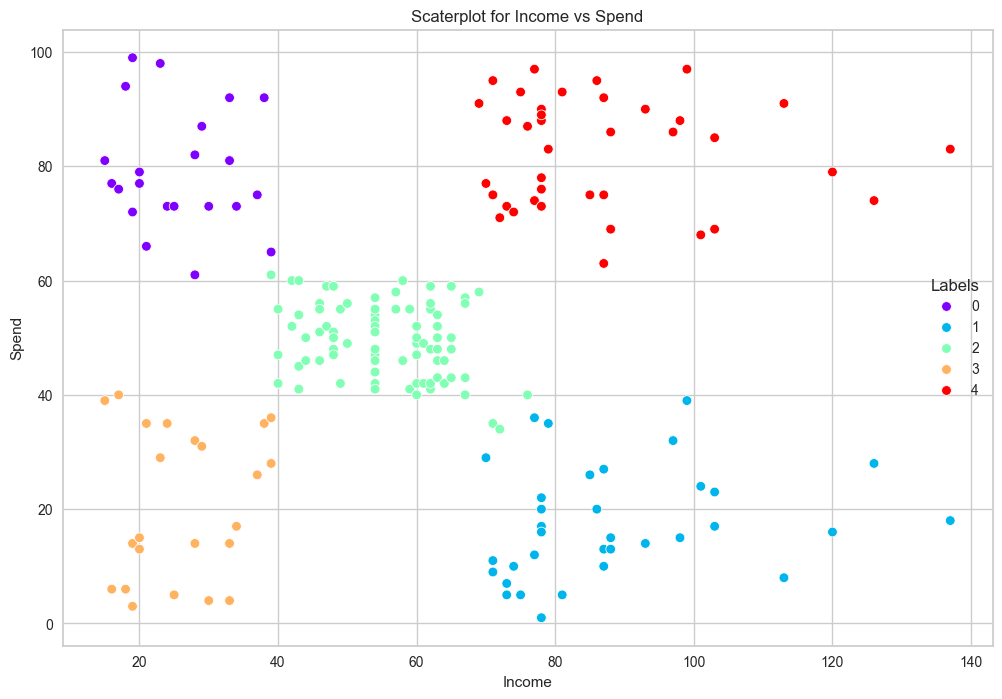

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=X, x='Income', y='Spend', hue='Labels', palette='rainbow')
plt.title('Scaterplot for Income vs Spend')
plt.show()

In [33]:
df.head()

,CustomerID,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Cluster Similar customers based on Age, Income, Spend

In [34]:
X2 = df[['Age', 'Income', 'Spend']]

In [35]:
X2.head()

,Age,Income,Spend
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [36]:
X2_pre = num_pipe.fit_transform(X2)
X2_pre.head()

,Age,Income,Spend
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


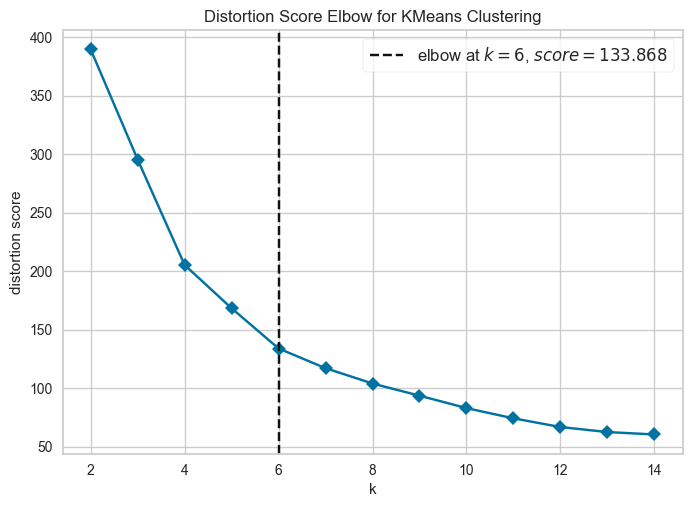

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [37]:
kelbow_visualizer(KMeans(), 
                  X2_pre,
                  k=(2,15),
                  timings=False)

In [38]:
model2 = KMeans(n_clusters=6)
model2.fit(X2_pre)

KMeans(n_clusters=6)

In [39]:
model2.labels_

array([3, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 2, 3, 5, 4,
       5, 3, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 0, 4, 0, 1, 0, 1, 0, 1, 0,
       4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [40]:
X2['Labels'] = model2.labels_

In [41]:
X2.head()

,Age,Income,Spend,Labels
0,19,15,39,3
1,21,15,81,3
2,20,16,6,5
3,23,16,77,3
4,31,17,40,5


In [42]:
X2['Labels'].unique()

array([3, 5, 2, 4, 0, 1])

In [43]:
for i in range(6):
    print(f'Cluster Number : {i}\n')
    display(X2[X2['Labels']==i])
    print('\n=====================================================\n')


Cluster Number : 0



,Age,Income,Spend,Labels
123,39,69,91,0
125,31,70,77,0
127,40,71,95,0
129,38,71,75,0
131,39,71,75,0
133,31,72,71,0
135,29,73,88,0
137,32,73,73,0
139,35,74,72,0
141,32,75,93,0




Cluster Number : 1



,Age,Income,Spend,Labels
126,43,71,35,1
128,59,71,11,1
130,47,71,9,1
134,20,73,5,1
136,44,73,7,1
138,19,74,10,1
140,57,75,5,1
144,25,77,12,1
146,48,77,36,1
148,34,78,22,1




Cluster Number : 2



,Age,Income,Spend,Labels
40,65,38,35,2
46,50,40,55,2
50,49,42,52,2
53,59,43,60,2
54,50,43,45,2
55,47,43,41,2
56,51,44,50,2
57,69,44,46,2
59,53,46,46,2
60,70,46,56,2




Cluster Number : 3



,Age,Income,Spend,Labels
0,19,15,39,3
1,21,15,81,3
3,23,16,77,3
5,22,17,76,3
7,23,18,94,3
9,30,19,72,3
11,35,19,99,3
13,24,20,77,3
15,22,20,79,3
17,20,21,66,3




Cluster Number : 4



,Age,Income,Spend,Labels
43,31,39,61,4
47,27,40,47,4
48,29,40,42,4
49,31,40,42,4
51,33,42,60,4
52,31,43,54,4
58,27,46,51,4
61,19,46,55,4
65,18,48,59,4
68,19,48,59,4




Cluster Number : 5



,Age,Income,Spend,Labels
2,20,16,6,5
4,31,17,40,5
6,35,18,6,5
8,64,19,3,5
10,67,19,14,5
12,58,20,15,5
14,37,20,13,5
16,35,21,35,5
18,52,23,29,5
20,35,24,35,5


## For 3D scaterplot visualization install PLotly and npformat

In [44]:
%pip install plotly nbformat

Note: you may need to restart the kernel to use updated packages.


## Visualize 3d scatterplot for clustering

In [46]:
import plotly.express as px


In [50]:
fig = px.scatter_3d(data_frame=X2, x='Age', y='Income', z='Spend', color='Labels')
fig.show()